In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

2024-04-20 18:29:39.526704: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 18:29:39.619272: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 18:29:39.986850: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 18:29:40.903589: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(
            image.img_to_array(
                image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
            )
        )
        labels.append((label))

    print("Number of images : ", len(images))
    return images, labels


def show_images(images):
    fig, axes = plt.subplots(
        1, 8, figsize=(20, 20), subplot_kw={"xticks": [], "yticks": []}
    )

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)


x = []
y = []

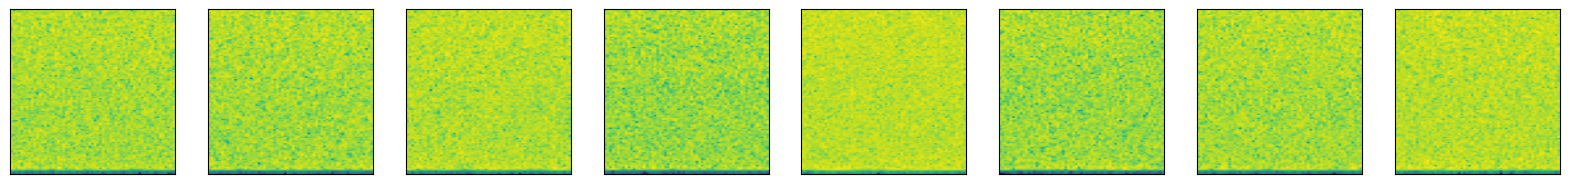

In [3]:
images, labels = load_images_from_path(
    "/home/arush/GW_Test_1/Data_Generation/DATA_V2/noise", 0
)
show_images(images)

x += images
y += labels

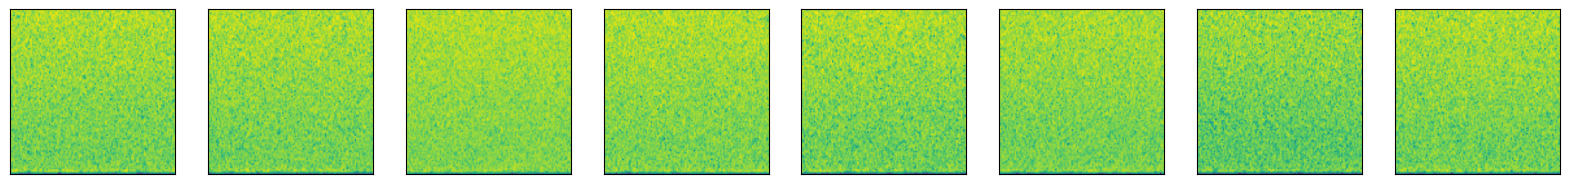

In [4]:
images, labels = load_images_from_path(
    "/home/arush/GW_Test_1/Data_Generation/DATA_V2/mass_20_to_20/5_to_8", 1
)
show_images(images)

x += images
y += labels

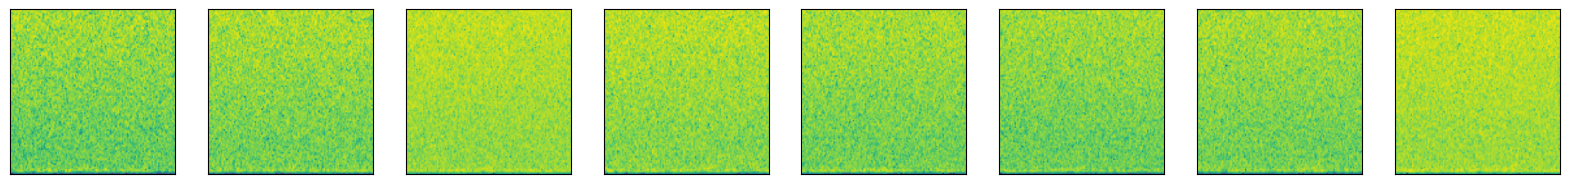

In [5]:
images, labels = load_images_from_path(
    "/home/arush/GW_Test_1/Data_Generation/DATA_V2/mass_20_to_20/8_to_11", 2
)
show_images(images)

x += images
y += labels

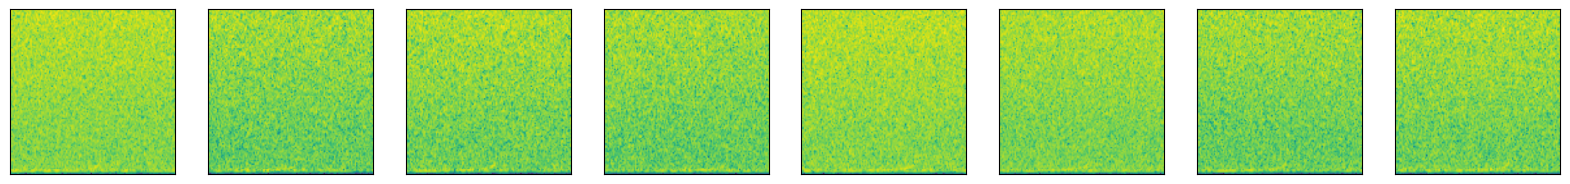

In [6]:
images, labels = load_images_from_path(
    "/home/arush/GW_Test_1/Data_Generation/DATA_V2/mass_20_to_20/11_to_14", 3
)
show_images(images)

x += images
y += labels

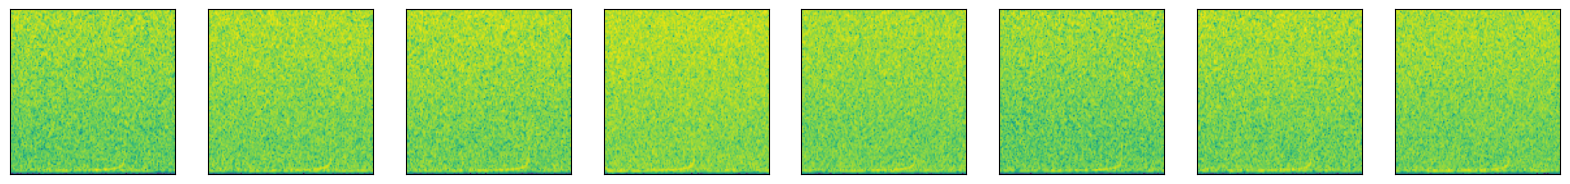

In [7]:
images, labels = load_images_from_path(
    "/home/arush/GW_Test_1/Data_Generation/DATA_V2/mass_20_to_20/14_to_17", 4
)
show_images(images)

x += images
y += labels

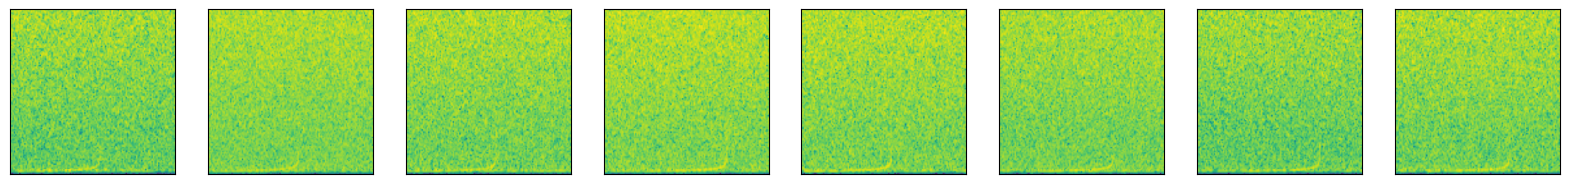

In [8]:
images, labels = load_images_from_path(
    "/home/arush/GW_Test_1/Data_Generation/DATA_V2/17_to_20", 5
)
show_images(images)

x += images
y += labels

In [9]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.3, random_state=0
)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [10]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Flatten, Dense

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))
# model.add(Flatten())
# model.add(Dense(1024, activation="relu"))
# model.add(Dense(6, activation="softmax"))
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# model.summary()
# hist = model.fit(
#     x_train_norm,
#     y_train_encoded,
#     validation_data=(x_test_norm, y_test_encoded),
#     batch_size=10,
#     epochs=10,
# )
# acc = hist.history["accuracy"]
# val_acc = hist.history["val_accuracy"]
# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, "-", label="Training Accuracy")
# plt.plot(epochs, val_acc, ":", label="Validation Accuracy")
# plt.title("Training and Validation Accuracy")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend(loc="lower right")
# plt.plot()

In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(
    weights="imagenet", include_top=False, input_shape=(224, 224, 3)
)

# x_train_norm = preprocess_input(np.array(x_train))
# x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

2024-04-20 18:30:39.960159: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3625316352 exceeds 10% of free system memory.


189/189 ━━━━━━━━━━━━━━━━━━━━ 107s 562ms/step


2024-04-20 18:32:30.749784: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1510548480 exceeds 10% of free system memory.
2024-04-20 18:32:34.551240: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1554051072 exceeds 10% of free system memory.


81/81 ━━━━━━━━━━━━━━━━━━━━ 46s 563ms/step


2024-04-20 18:33:21.635345: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 647521280 exceeds 10% of free system memory.


In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense


model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(2048, activation="relu"))
model.add(Dense(6, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
hist = model.fit(
    train_features,
    y_train_encoded,
    validation_data=(test_features, y_test_encoded),
    batch_size=10,
    epochs=10,
)

Epoch 1/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 831s 1s/step - accuracy: 0.4275 - loss: 15.6658 - val_accuracy: 0.5045 - val_loss: 1.1143
Epoch 2/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 828s 1s/step - accuracy: 0.5598 - loss: 0.9597 - val_accuracy: 0.5343 - val_loss: 0.9678
Epoch 3/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 832s 1s/step - accuracy: 0.6098 - loss: 0.8588 - val_accuracy: 0.5870 - val_loss: 0.8609
Epoch 4/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 809s 1s/step - accuracy: 0.6288 - loss: 0.8010 - val_accuracy: 0.5614 - val_loss: 0.9493
Epoch 5/10
 30/603 ━━━━━━━━━━━━━━━━━━━━ 12:37 1s/step - accuracy: 0.5450 - loss: 0.9592

189/189 ━━━━━━━━━━━━━━━━━━━━ 111s 585ms/step


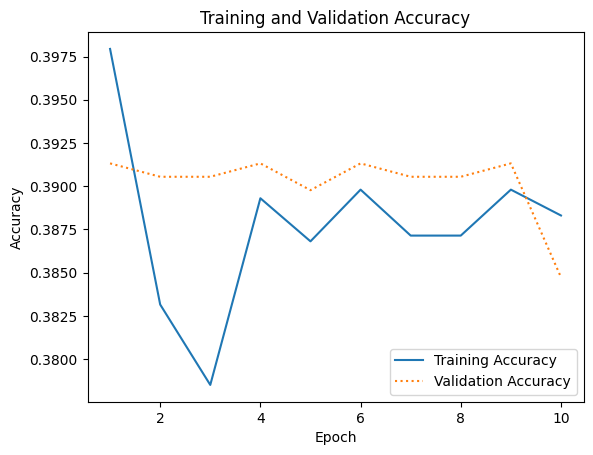

In [14]:
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "-", label="Training Accuracy")
plt.plot(epochs, val_acc, ":", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.plot()
train_features = base_model.predict(x_train_norm)

81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


Text(109.44999999999997, 0.5, 'Actual SNR')

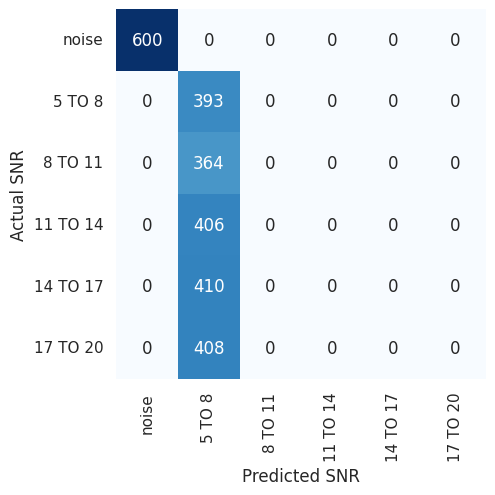

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ["noise", "5 TO 8", "8 TO 11", "11 TO 14", "14 TO 17", "17 TO 20"]

sns.heatmap(
    mat,
    square=True,
    annot=True,
    fmt="d",
    cbar=False,
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels,
)

plt.xlabel("Predicted SNR")
plt.ylabel("Actual SNR")

In [16]:
model.save("complex_spectrogram_model_v3.keras")